# Trabajo Final de Modelado y Simulación de Sistemas Complejos con Aplicaciones en Economía
## Análisis ecológico de estrategias en el *ultimatum game* iterado. ¿Por qué no ser tacaños? 

Facultad de Ciencias Exactas y Naturales - UBA  
1° cuatrimestre 2024  

#### Integrantes

| **Nombre** | **Email** | **LU** |
| -- | -- | -- |
| Juan Zaragoza | juanfernandezzaragoza@hotmail.com | 839/17 |
| Francisco Romano | franciscoromano795@gmail.com | 28/16 |
| Ivo Lamonica | ivolamonicam@gmail.com | 66/22 |
| Matías Neville | nevillematias@gmail.com | 88/22 |

#### Índice
1. Introducción
   1. Esquema de estudio
2. La estrategia Tacaña en contextos ecológicos
   1. El Equilibrio de Nash en Ultimatum Game
   2. De la acción a la estrategia
   3. La ecología de estrategias
   4. Estrategias
   5. Parámetros globales y análisis
   6. Evolución de estrategias
3. La estrategia tacaña evoluciona mediante un algoritmo genético
   1. El algoritmo genético
4. Implementación ad-hoc de una estrategia antitacaña
   1. Comparando estrategias
   2. Análisis cuantitativo
5. La reciprocidad genera una cuenca robusta
   1. Diseño de una estrategia recíproca
   2. Analizando a la recíproca contra la tacaña
6. Conclusiones
7. Próximos pasos
   1. Enfoque ecológico
   2. Enfoque genético
8. Bonus: Meme
9.  Referencias

### 1 - Introducción

El *ultimatum game* es un juego asimétrico de dos agentes. El **oferente** tiene a su disposición una suma de dinero $X$, de la cual le ofrece un porcentaje a un **receptor**. Si el receptor acepta la propuesta, recibe el porcentaje de $X$ propuesto por el oferente, y el oferente se queda con el porcentaje restante. Si el receptor rechaza la oferta, ninguno de los dos participantes recibe nada.

El único **equilibrio de Nash** de subjuegos perfectos en el *ultimatum game* es que el oferente ofrezca una suma infinitesimal de dinero al receptor, y que el receptor acepte la oferta (Schuster, 2017). Sin embargo, las personas no suelen adoptar la estrategia óptima de Nash en contextos experimentales. Por ejemplo, la oferta mediana en la mayoría de los estudios experimentales es del 50%, la oferta media ronda el 40%, y los receptores suelen rechazar ofertas menores al 50% frecuentemente (Brosnan, 2009).

En este trabajo, usamos modelos de múltiples agentes con comportamientos adaptativos para postular una hipótesis de por qué emerge la disociación entre el comportamiento práctico de las personas y la estrategia asociada equilibrio de Nash de subjuegos perfectos (desde ahora, "estrategia tacaña"). Para ello, estudiaremos el rendimiento de distintas estrategias para el *ultimatum game* iterado desde dos enfoques de modelado:

- El primero es el **enfoque ecológico**, propuesto por Axelrod, para estudiar el dilema del prisionero iterado (Axelrod, 1983).
- El segundo es un **enfoque genético**, que permite estudiar la evolución automática de estrategias representadas por redes neuronales (Stanley, 2002).
    
Para facilitar la lectura, expondremos y justificaremos los enfoques utilizados en las secciones correspondientes.

#### 1.1 - Esquema del Estudio

El presente estudio cuenta con cuatro secciones.

1. **La estrategia tacaña en juegos iterados**: Aunque a veces las estrategias convenientes en un juego iterado difieren de los equilibrios de Nash estables para una sola ronda del mismo juego (Axelrod, 1983), la estrategia tacaña es exitosa en experimentos ecológicos del *ultimatum game* iterado. Además, cuando toda la población de agentes implementa la estrategia tacaña, el *payoff* medio de la población general es el máximo posible.

2. **Evolución automática de la estrategia tacaña**: Un algoritmo genético sobre la estrategia de los agentes generó la estrategia tacaña automáticamente en reiteradas ejecuciones. Identificamos cuatro características que la vuelven idónea para emerger en contextos evolutivos: su simplicidad, consistencia, optimalidad a nivel social y robustez.

3. **Estrategia antitacaña**: Una estrategia diseñada *ad hoc* para desplazar a la estrategia tacaña, a la que denominamos "estrategia antitacaña", supera a la tacaña cuando es adoptada por más del 30% de la población. La estrategia antitacaña es óptima para desplazar a la estrategia tacaña, lo que implica que la estrategia tacaña es robusta y genera un efecto *lock-in* una vez que es adoptada por más del 70% de los agentes.

4. **Por qué no ser tacaños**: Algunas observaciones de la psicología conductual conducen a la hipótesis de que las personas implementan una estrategia similar a la reciprocidad al jugar al *ultimatum game*, a la que denominamos "estrategia recíproca". Los experimentos ecológicos muestran que una vez que una parte mayoritaria de la población implementa la estrategia recíproca, se vuelve más ventajoso para los individuos adoptar la estrategia recíproca que adoptar la estrategia tacaña.

### 2 - La estrategia tacaña en contextos ecológicos

#### 2.1 - El equilibrio de Nash en el *ultimatum game* 

Al jugar una sola ronda del *ultimatum game*, el único equilibrio de Nash estable de subjuegos perfectos es que el oferente le ofrezca al receptor quedarse con una suma infinitesimal y que el receptor la acepte. 

Esto es así porque el receptor gana más dinero al aceptar cualquier oferta positiva que al no aceptarla, por infinitesimal que sea. En consecuencia, el comportamiento óptimo para el oferente es ofrecer porcentajes infinitesimales, dado que el receptor aceptará cualquier oferta.

#### 2.2 - De la acción a la estrategia

En juegos de una sola ronda de dos jugadores, cada agente decide qué **acción** o distribución de acciones ejecutar, a partir de las acciones que podría ejecutar el otro agente.

En los juegos iterados, cada agente considera las acciones que ejecutó el otro agente en el pasado, además de las acciones que podría ejecutar en cada encuentro. En este caso, se dice que los agentes implementan una **estrategia**. Una estrategia es una función que determina qué acción ejecutar a partir del **historial** de encuentros entre ambos agentes. 

Como las estrategias adaptan las acciones al historial de encuentros, las acciones de un agente en un encuentro pueden influir en las acciones de otros agentes en encuentros subsiguientes.

La adaptatividad de las acciones al historial implica que pueden existir estrategias exitosas en juegos iterados que implementen acciones diferentes a los equilibrios de Nash en los juegos correspondientes de una sola ronda. Un ejemplo paradigmático de esto es el dilema del prisionero iterado, en que la reciprocidad es exitosa y promueve la cooperación con otros agentes, mientras que el equilibrio de Nash estable en el dilema del prisionero es traicionar al coparticipante (Axelrod, 1983).

Esto es así porque, en los juegos iterados con decisiones adaptativas, los agentes pueden escoger una acción subóptima en un juego que incida en las decisiones de los otros agentes en juegos subsiguientes para mejorar sus propios *payoffs* en el largo plazo.

Para estudiar la emergencia de la reciprocidad en contextos de dilema del prisionero iterado, Axelrod propuso un enfoque denominado **ecología de estrategias**. La ecología de estrategias es un enfoque computacional de múltiples agentes que ayuda a identificar estrategias convenientes para juegos iterados a partir de poblaciones iniciales determinadas.

#### 2.3 - La ecología de estrategias

La ecología de estrategias añade una segunda capa de adaptatividad a las estrategias. El enfoque ecológico determina cómo los agentes adaptan la estrategia que implementan según qué estrategias son más exitosas en un contexto poblacional determinado.

La ecología de estrategias se inicializa con un conjunto finito de estrategias $e_i$, asociados a las cantidades $n_i$ de agentes que empezarán implementando cada estrategia. En nuestra implementación, también toma la topología del grafo en que los agentes jugarán al juego, donde cada agente sólo jugará con sus vecinos en el grafo. 

Luego, el sistema evoluciona por **generaciones**. En cada generación, se actualiza la proporción de agentes $n_i$ que adoptan cada estrategia según el rendimiento de cada estrategia $e_i$ en la generación anterior, de la siguiente manera:

1. Repartir las estrategias aleatoriamente entre los agentes, asignando cada estrategia $e_i$ a $n_i$ agentes con probabilidad uniforme.
2. Durante $k$ turnos, elegir dos vecinos al azar para que jueguen al *ultimatum game*, siguiendo cada uno su estrategia. 
3. Calcular el fitness de cada agente. En nuestra implementacion, el fitness de cada agente es el *payoff* medio en los juegos en que participó.
4. Calcular el fitness $f_i$ de cada estrategia $e_i$, es decir, la suma de fitnesses de los agentes que implementaron $e_i$ sobre la suma de fitnesses de todos los agentes que jugaron. Así, el fitness de cada estrategia es la proporción ganados por la estrategia en la generación finalizada.
5. Actualizar $n_i$ para todas las estrategias. El nuevo valor será la proporción dada por $f_i$ del número de agentes que participan en el juego. De esta manera, la cantidad de agentes que usa la estrategia *e_i* en una generación está dada por la proporción de puntos que obtuvo la estrategia *e_i* en la generación anterior.

En nuestra implementación, el oferente tiene a su disposición 10 unidades de valor para repartir, y puede ofrecer al receptor cualquier cantidad entera entre 1 y 9 inclusive. 

El enfoque ecológico enriquece el análisis de estrategias. Observemos que si sólo se considerara el *fitness* de los agentes que usan cada estrategia para una distribución de estrategias determinada, se perderían efectos interesantes en la adopción de estrategias dados por la dinámica de las poblaciones. Recordemos que el rendimiento de cada estrategia depende de la distribución de las estrategias restantes en la población. Esto implica que parte del impacto de una estrategia es mejorar o perjudicar la viabilidad de otras estrategias. Por este motivo, es importante considerar los cambios poblacionales a través de las generaciones. 

Por ejemplo, una estrategia puede tener un *fitness* bajo en una generación, pero disminuir el fitness de estrategias que le son perjudiciales o mejorar el fitness de estrategias que le son beneficiosas, lo cual incidiría en otras poblaciones y mejoraría su propio *fitness* en las generaciones futuras. Por otra parte, una estrategia puede tener un *fitness* alto en una generación, pero perjudicar a estrategias que le son beneficiosas o beneficiar a estrategias que le son perjudiciales, lo cual incidiría en otras poblaciones y disminuiría su propio *fitness* en las generaciones futuras.

En esta primera sección, evaluamos la estrategia tacaña en un contextos ecológicos compartidos con otras estrategias sencillas, y mostramos que es exitosa. Esta observación no es trivial, porque existen casos en que las estrategias convenientes en juegos iterados difieren de los equilibrios de Nash estables para una sola ronda del mismo juego. Además, observamos que a medida que todos los agentes tienden a adoptar la estrategia tacaña, el *payoff* medio obtenido por los agentes tiende a alcanzar el máximo valor posible.

#### 2.4 - Estrategias

Como el *ultimatum game* es un juego asimétrico, las estrategias se dividen en dos subestrategias, una para determinar el reparto a proponer, y otra para evaluar si aceptar o rechazar las ofertas de otros participantes.

- La estrategia **tacaña** implementa la estrategia asociada al equilibrio de Nash de subjegos perfectos en contextos de *ultimatum game* de un solo encuentro con valores enteros:
- Ofrece siempre 1.
- Acepta cualquier oferta que le presenten.

Para iniciar la evaluación de su funcionamiento, estudiamos su rendimiento en contextos ecológicos en que participaban otras 7 estrategias sencillas:

- La estrategia **azarosa**:
    - Ofrece al receptor un valor entero entre 1 y 9 al azar, de manera equiprobable.
    - Decide si aceptar o no las ofertas al azar, de manera equiprobable.

- La estrategia **hostil**:
    - Ofrece siempre 1.
    - Rechaza todas las ofertas.

- La estrategia **promedio**:
    - Ofrece el promedio histórico de las ofertas que le hizo su vecino (redondeado al entero más cercano).
    - Acepta una oferta si es igual o mayor al promedio de ofertas hechas por su vecino que aceptó en el pasado.

- La estrategia **matching**:
    - Ofrece lo que le propusieron en el último encuentro (si no hubo encuentros anteriores, ofrece 5).
    - Acepta cualquier oferta igual o mayor a lo que ella misma ofreció el encuentro anterior (si no hubo encuentros anteriores, acepta cualquier oferta).

- La estrategia **justa**:
    - Ofrece 5 siempre
    - Acepta una oferta si y solo si el valor ofrecido es mayor o igual a 5.

- La estrategia **gradual**:
    - Si en el turno anterior aceptaron su propuesta, ofrece una unidad menos que la ofrecida en el turno anterior. Si en el turno anterior rechazaron su propuesta, ofrece una unidad más que en el turno anterior.
    - Acepta todas las propuestas.

In [1]:
from ecologico import Ecologico
from ultimatum import *
from agente import Agente
from estrategias import *
from genome import Genome, World
from experimentos import Experimentos
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
# Declaración de estrategias. 

## Estrategias sencillas

azarosa = (estrat_proponer_rand, estrat_aceptar_rand)
hostil = (estrat_proponer_tacaña, estrat_aceptar_nunca)
promedio = (estrat_proponer_promedio, estrat_aceptar_promedio)
matching = (estrat_proponer_matching, estrat_aceptar_matching)
justa = (estrat_proponer_justa, estrat_aceptar_justa)
gradual = (estrat_proponer_gradual, estrat_aceptar_gradual)

## Estrategia evaluada en la sección 1

tacaña = (estrat_proponer_tacaña, estrat_aceptar_siempre)

## Estrategias que serán presentadas en las secciones 3 y 4

antitacaña = (estrat_proponer_antitacaña_2, estrat_aceptar_antitacaña)
reciproca = (estrat_proponer_t4t, estrat_aceptar_t4t)

#### 2.5 - Parámetros globales y análisis

Para los experimentos subsiguientes, estudiaremos la ecología en distintas estrategias sobre grafo aleatorio denso para una población de 100 agentes.

Los experimentos ecológicos consisten en **100 generaciones**, cada una de **10000 encuentros** entre pares de los **50 agentes**. Así, cada agente participará, en promedio, en 400 instancias del juego, lo cual permite que cada agente participe en reiterados juegos junto con estrategias diferentes.

In [4]:
n_agentes = 50
n_generaciones = 100
n_turnos_por_generacion = 10000 # Observamos que es suficiente para ver efectos de penalizaciones.

# Setear las variables globales para todos los experimentos
experimentos = Experimentos(n_turnos_por_generacion, n_generaciones, n_agentes)

topologia_densa = create_random_adjacency_list(n_agentes, 30*49/2)

Con estos parámetros, podemos observar qué sucede cuando todas las estrategias inician con una cantidad similar de agentes. Por redondeo, le asignamos a la azarosa dos agentes más.

In [5]:
"""
Estrategias es un diccionario cuya clave es el nombre de la estrategia y sus valores son una tupla que contiene:
    - La función que determina cuánto proponer, a partir del historial de encuentros.
    - La función que determina cuándo aceptar, a partir del historial de encuentros y el valor propuesto por el otro jugador.
    - La cantidad de agentes que empiezan jugando con dicha estrategia en la primera generación.
"""

estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 8),
    "hostil" : (hostil[0], hostil[1], 7),
    "promedio" : (promedio[0], promedio[1], 7),
    "matching" : (matching[0], matching[1], 7),
    "justa" : (justa[0], justa[1], 7),
    "gradual" : (gradual[0], gradual[1], 7),
    "tacaña" : (tacaña[0], tacaña[1], 7)
}

Veamos cómo evoluciona la ecología para las poblaciones iniciales recién definidas.

A la izquierda, vemos cómo cambian las poblaciones para una ejecución particular. A la derecha, vemos la población media de estrategias sobrevivientes en la generación 100,  a través de 100 simulaciones.

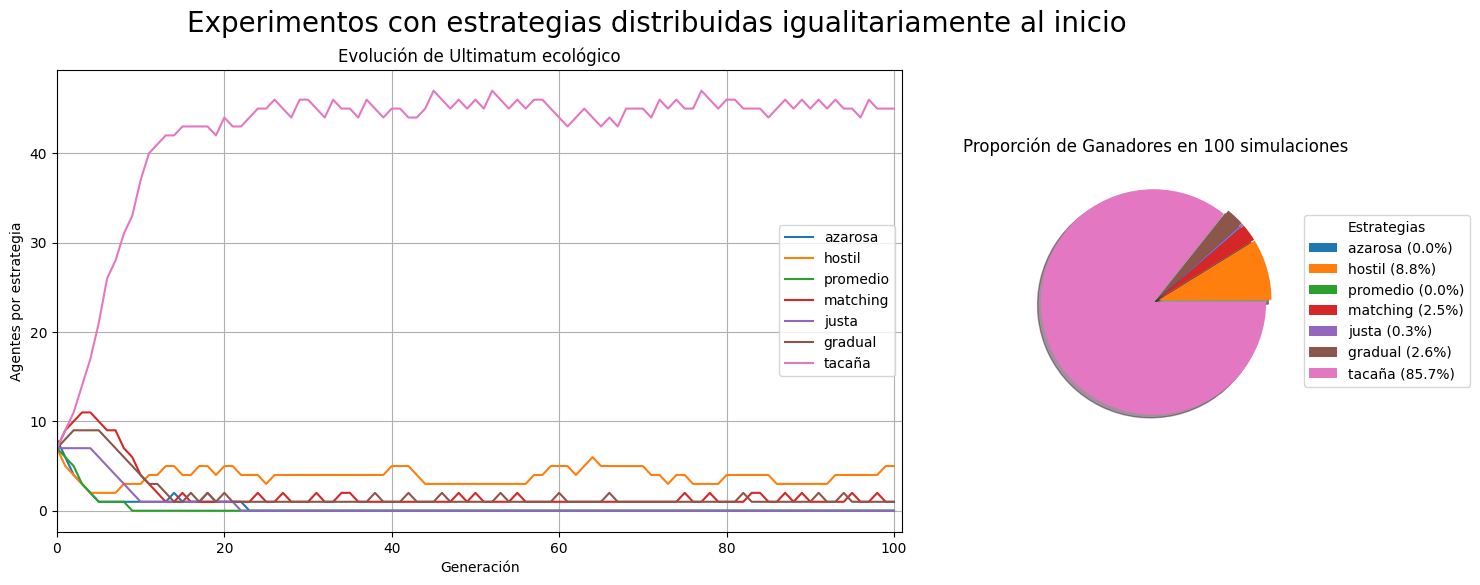

In [9]:
experimentos.graficar_evolucion_y_ganadores(estrategias, topologia_densa, cantidad_simulaciones=100, titulo="Experimentos con estrategias distribuidas igualitariamente al inicio") 

Observamos que la estrategia tacaña gana en el 85% de las ejecuciones. Podemos ver qué sucede cuando la estrategia tacaña inicia con una cantidad de agentes incluso menor:

In [10]:
estrategias_ajustada = {
    "azarosa" : (azarosa[0], azarosa[1], 8),
    "hostil" : (hostil[0], hostil[1], 8),
    "promedio" : (promedio[0], promedio[1], 8),
    "matching" : (matching[0], matching[1], 8),
    "justa" : (justa[0], justa[1], 7),
    "gradual" : (gradual[0], gradual[1], 7),
    "tacaña" : (tacaña[0], tacaña[1], 4)
}

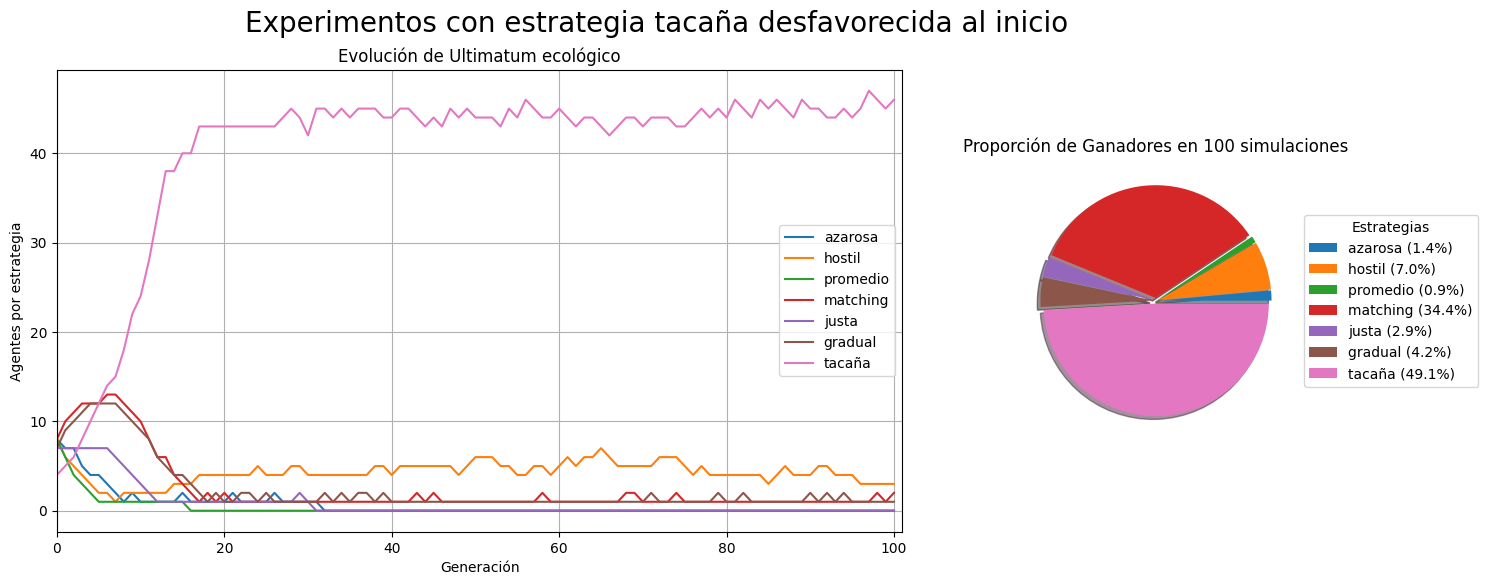

In [11]:
experimentos.graficar_evolucion_y_ganadores(estrategias_ajustada, topologia_densa, cantidad_simulaciones=100, titulo="Experimentos con estrategia tacaña desfavorecida al inicio")

En este caso, la estrategia tacaña alcanzó su éxito en el 50% de las ejecuciones, incluso habiendo iniciado con el 8% de los agentes totales en vez del ~15% como antes.

#### 2.6 - Evolución de estrategias
Si graficamos la media de puntos obtenida por la población general a medida que cambia la población que adopta cada estrategia, podemos observar que, a medida que la estrategia tacaña es adoptada por la mayoría de los agentes, la media de puntos obtenida por la totalidad de la población tiende al máximo.

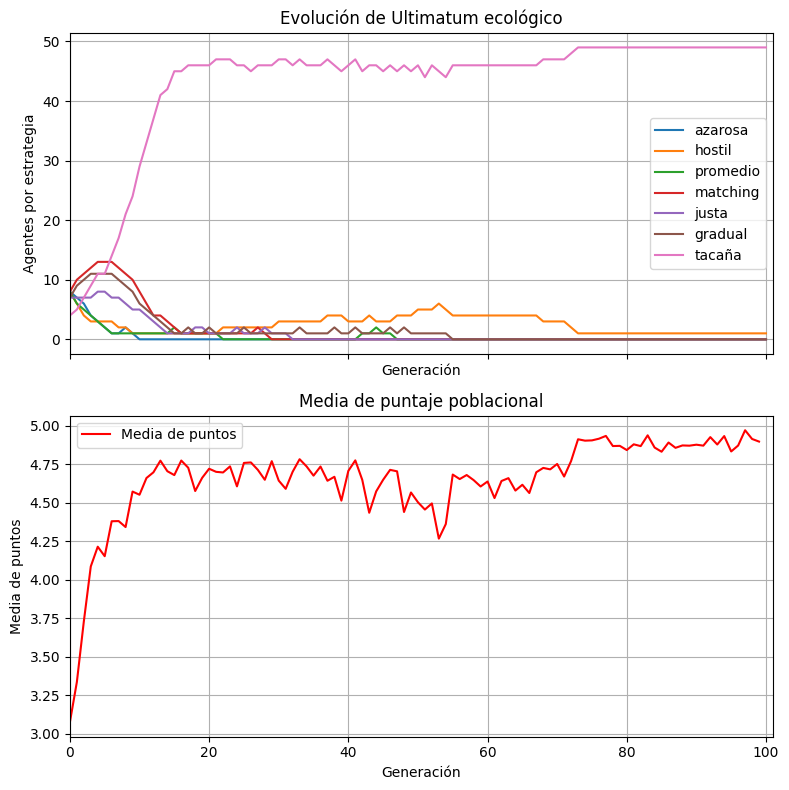

In [21]:
experimentos.graficar_evolucion_poblacional(estrategias_ajustada, topologia_densa, True)

La población suele ganar más puntos cuando todos implementan la estrategia tacaña, ya que, al ser adoptada por todos los agentes, **nadie rechaza ninguna una oferta**.

La estrategia tacaña es la más exitosa entre las estrategias de control, y cuando triunfa, el ecosistema adquiere un óptimo social en términos de *payoff* medio para los agentes. Esto sugiere que la adopción de estrategias diferentes a la tacaña en contextos empíricos se debe a factores distintos a la inadecuación de la estrategia para contextos iterados.

### 3 - La estrategia tacaña evoluciona mediante un algoritmo genético

Además de ser adecuada en contextos ecológicos de control, veremos que la estrategia tacaña cumple algunas propiedades que la vuelven capaz de emerger evolutivamente. Para ello, implementamos un algoritmo genético para simular la evolución automática de estrategias para el *ultimatum game* iterado.

#### 3.1 - El algoritmo genético

Los algoritmos genéticos son una forma de **aprendizaje por refuerzos** inspirados en la evolución biológica.

La unidad de evolución son los *genomas*, tiras de símbolos que codifican un comportamiento.

La evolución sucede por generaciones. En cada generación, se le asigna un genoma al azar, que codifica una estrategia, a cada uno de los $n$ agentes que participan en el juego. 

Al final de la generación, los $k$ genomas más exitosos sobreviven y pasan a la siguiente generación, y los $n - k$ genomas menos exitosos se extinguen. 

Para iniciar la siguiente generación, se completan los $n - k$ genomas faltantes con mutaciones aleatorias de los genomas sobrevivientes.

A través de las generaciones, la selección natural tiende a mejorar el *fitness* alcanzado por los agentes.

En nuestra implementación, los genomas codifican estrategias mediante redes neuronales. Cada genoma es una tira de símbolos que representa los nodos, las conexiones, y los pesos asociados a la red neuronal. Para ello, seguimos la implementación de Stanley (Stanley, 2002), que permite evolucionar tanto la topología como los pesos y *biases* de la red neuronal mediante algoritmos genéticos.

La representación de las redes neuronales que diseñamos para representar estrategias del *ultimatum game* es la siguiente.

Para **proponer**:

Cuatro neuronas funcionan como input, en el orden siguiente:
1. El valor ofrecido por el agente en el último encuentro.
2. Si en el último encuentro el coparticipante rechazó o aceptó la propuesta.
3. El valor ofrecido por el agente en el anteúltimo encuentro.
4. Si en el anteúltimo encuentro el coparticipante rechazó o aceptó la propuesta.

En caso de que no haya información de encuentros anteriores, los valores se inicializan en cero.

El output está dado por una sola neurona. Si el valor de output es menor a uno, se propone uno. Si el valor de output es mayor a nueve, se propone nueve. De otro modo, se propone el redondeo entero del valor en la neurona de output.

Para **evaluar** propuestas:

Cinco neuronas funcionan como input, en el orden siguiente:
1. El valor ofrecido por el coparticipante en el último encuentro.
2. Si en el último encuentro el agente rechazó o aceptó la propuesta.
3. El valor ofrecido por el coparticipante en el anteúltimo encuentro.
4. Si en el anteúltimo encuentro el agente rechazó o aceptó la propuesta.
5. El valor ofrecido por el coparticipante en el encuentro actual.

El output está dado por una sola neurona. Si el valor de output es menor a cero, la propuesta se rechaza. Si es mayor a cero, se acepta.

El algoritmo genético se inicializa asignando dos redes neuronales de pesos y biases aleatorios sin capas intermedias a cada agente, una para decidir cuánto proponer y otra para decidir cuánto aceptar.

Luego, el sistema evoluciona mediante generaciones, cada una de las cuales funciona del siguiente modo:

1. Se reparten los genomas al azar entre $n$ agentes. Los genomas codifican redes neuronales que definen estrategias.
2. Se juegan $k$ turnos del *ultimatum game* entre pares de vecinos en el grafo, elegidos con probabilidad uniforme.
3. Se calculan el *payoff* medio de cada agente, que es el *payoff* total obtenido sobre la cantidad de negociaciones en que participó.
4. Se toman los genomas sobrevivientes, que son los genomas de los $s$ agentes de mejor rendimiento en la generación anterior. El resto de los genomas se elimina.
5. Se crean $m = n - s$ genomas nuevos para completar la población. Los nuevos genomas se obtienen a partir de las siguientes mutaciones:
    1. Modificar los pesos y *biases* de algún genoma sobreviviente aleatoriamente.
    2. Añadir un nuevo nodo a algún genoma sobreviviente.
    3. Añadir una nueva conexión a algún genoma sobreviviente.
    4. "Cruzar" dos genomas sobrevivientes, tomando partes de la estructura de uno y partes de la estructura de otro.

Las mutaciones implementadas siguen la caracterización de Stanley.

A continuación, podemos observar el resultado de una ejecución de la evolución genética de estrategias en un contexto de 70 agentes, con 20 sobrevivientes por generación, 30 genomas obtenidos por mutar pesos, 10 genomas obtenidos por cruces, 5 genomas obtenidos de añadir un nuevo nodo y 5 genomas obtenidos de añadir una nueva conexión.

In [12]:
from evolucionar_estrategia_genetica import *

genoma_estrategia_evolucionada, otros_genomas_sobrevivientes = evolucionar_estrategia_genetica()

Generaciones: [########################################] 100.00%


Podemos saber si el genoma de mayor fitness en la última generación implementa la estrategia tacaña, o en su defecto, si  algún genoma sobreviviente en la última generación implementa la estrategia tacaña, analizando qué respondería cada agente ante cada input posible. Si siempre propone 1 y siempre acepta, el genoma implementa la estrategia tacaña.


In [13]:
print(implementa_estrategia_tacaña(genoma_estrategia_evolucionada))
print(alguno_implementa_estrategia_tacaña(otros_genomas_sobrevivientes))

True
(True, (<genome.Genome object at 0x743922999210>, <genome.Genome object at 0x7439225d6610>))


La estrategia tacaña evolucionó mediante el algoritmo genético. Razonamos que la estrategia tacaña tiene algunas características, además de ser una estrategia exitosa en contextos de control, que la vuelven idónea para emerger evolutivamente.

1. En primer lugar, es **simple**. La estrategia tacaña se caracteriza por dos funciones constantes: ofrece siempre 1, y acepta siempre. Esto implica que es una estratetegia de una complejidad de Kolmogorov mínima.

2. En segundo lugar, es **robusta**, en el sentido de que, una vez que es implementada por varios agentes, es difícil que alguna otra estrategia sea adoptada por la población en el futuro. Demostraremos esta afirmación en la sección 3.

3. En tercer lugar, es **socialmente óptima**, en el sentido de que una vez que es adoptada por toda la población, el *payoff* medio para la población es el máximo posible. Esto implica que otras estrategias no pueden explotar la suboptimalidad social por medio de grupos pequeños de otras estrategias que cooperen entre sí para alcanzar *payoffs* medios mayores, como sí sucede en otros contextos como el dilema del prisionero iterado (Axelrod, 1983).

4. En cuarto lugar, es **consistente**. Los procesos evolutivos suelen buscar óptimos locales más que óptimos globales (Holland, 75). La estrategia tacaña, además de funcionar bien en juegos iterados, induce un comportamiento que es conveniente en el corto plazo, porque implementa un equilibrio de Nash de subjuegos perfectos para el juego de una sola instancia. Esta observación no aplica al contexto del algoritmo genético, pero sí favorece la posibilidad de adoptar la estrategia tacaña en contextos de prueba y error.

Hasta aquí, parece sorprendente que las personas no implementen la estrategia tacaña en los experimentos. Sin embargo, existen contextos poblacionales en que la estrategia tacaña deja de ser la estrategia más conveniente, como lo veremos a continuación. 

### 4 - Implementaciones *ad-hoc* de una estrategia anti-tacaña

Para investigar contextos en que la estrategia tacaña deja de ser conveniente, formulamos una estrategia diseñada *ad-hoc* para desplazar a la estrategia tacaña, a la que denominamos "estrategia antitacaña". 

El diseño propuesto para la **estrategia antitacaña** es el siguiente:
- Ofrece 1 si y solo si el otro agente le ofreció menos de 3 en el pasado. Caso contrario, ofrece 3.
- Acepta una oferta si, y sólo si, es mayor a 3.

In [6]:
estrategias = {
    "tacaña" : (tacaña[0], tacaña[1], 25),
    "antitacaña" : (antitacaña[0], antitacaña[1], 25)
}

#### 4.1 - Comparando estrategias

Cuando la estrategia tacaña y la estrategia antitacaña se encuentran en igualdad de condiciones en la ecología de estrategias, la estrategia antitacaña gana el 100% de las veces. 

A la izquierda, podemos observar una ejecución particular de la ecología de estrategias, en la cual la estrategia tacaña se extingue en tan solo 9 generaciones. 

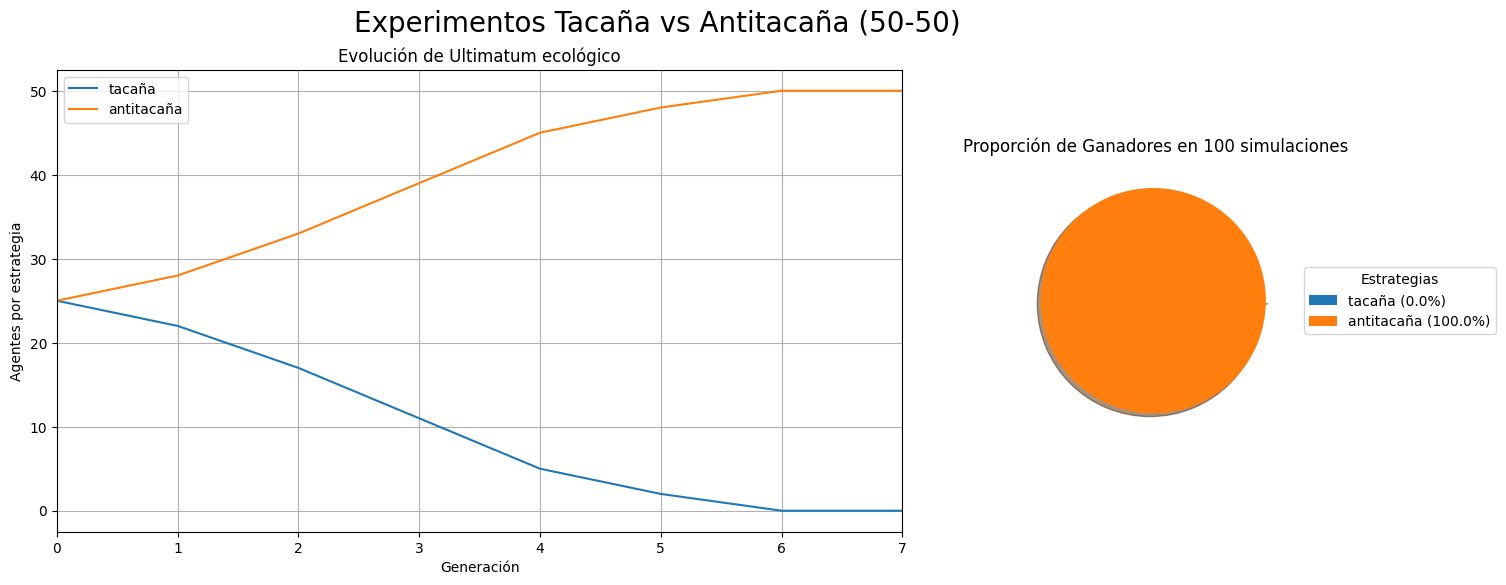

In [23]:
experimentos.graficar_evolucion_y_ganadores(estrategias, topologia_densa, cantidad_simulaciones=100, titulo="Experimentos Tacaña vs Antitacaña (50-50)")

#### 4.2 - Análisis cuantitativo

La implementación *ad-hoc* de una estrategia antitacaña muestra que existen contextos de poblaciones de estrategias en que no es conveniente para los agentes implementar la estrategia tacaña.

Sin embargo, la mera existencia de estrategias antitacañas en el ecosistema no implica necesariamente un desplazamiento de las estrategias tacañas. Por ejemplo, cuando hay 10 estrategias antitacañas y 40 estrategias tacañas, las estrategias tacañas ganan sistemáticamente.

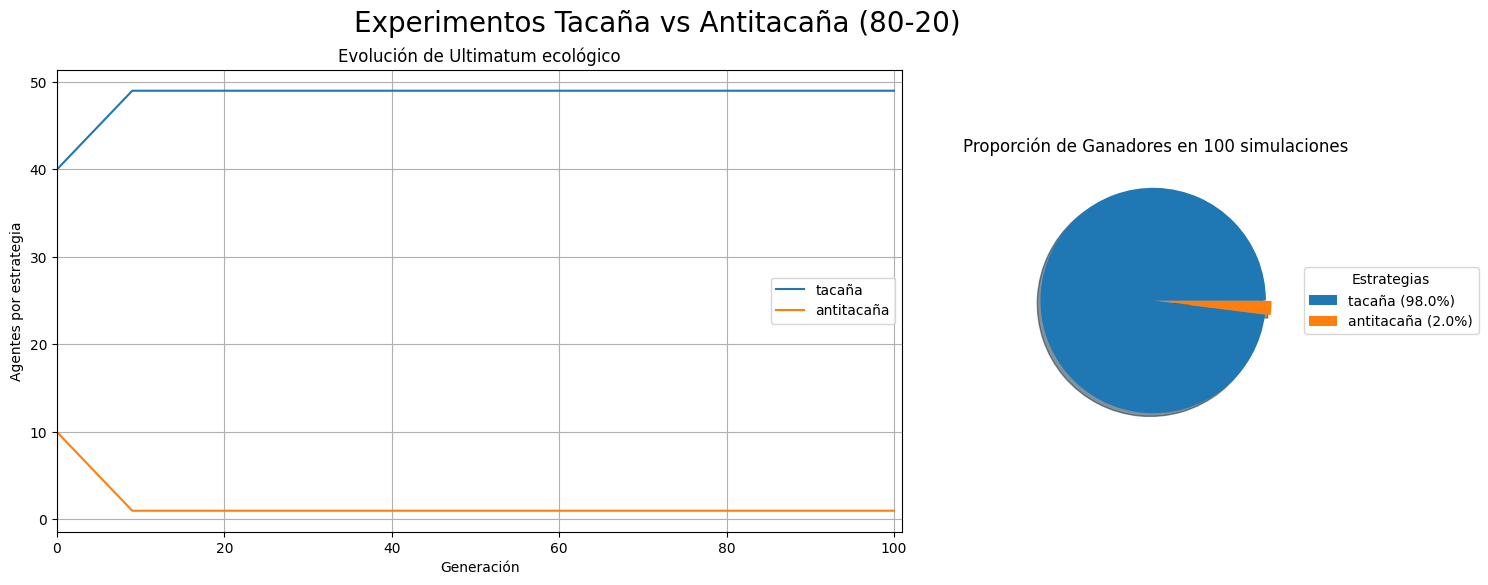

In [7]:
estrategias_ajustada = {
    "tacaña" : (tacaña[0], tacaña[1], 40),
    "antitacaña" : (antitacaña[0], antitacaña[1], 10)
}

experimentos.graficar_evolucion_y_ganadores(estrategias_ajustada, topologia_densa, cantidad_simulaciones=100, titulo="Experimentos Tacaña vs Antitacaña (80-20)")

Observemos que cuando los tacaños o los antitacaños negocian con agentes que usen la misma estrategia que ellos, obtienen un *payoff* medio de cinco puntos, porque los tacaños aceptan toda propuesta, y porque los antitacaños aceptan todas las propuestas mayores o iguales a 3, y se ofrecen 3 entre sí.

Al negociar entre tacaños y antitacaños, el *payoff* medio para los antitacaños es de 4.5 puntos y el de los tacaños es de 0.5 puntos, porque cuando los tacaños son oferentes los antitacaños rechazan las ofertas y ganan 0 puntos cada uno, y cuando los antitacaños son oferentes, ofrecen 1 a los tacaños, quienes aceptan la propuesta siempre.

Cuando hay poca población antitacaña, la probabilidad de que las negociaciones crucen tacaños y tacaños supera suficientemente a la probabilidad de que se crucen antitacaños y antitacaños para compensar el payoff mayor de los antitacaños cuando se encuentran entre grupos, lo que explica por qué existen valores iniciales de estrategias antitacañas para los cuales gane la estrategia tacaña.

Para indagar en qué proporciones iniciales de adopción de cada estrategia inducen la victoria de cada una, graficamos la proporción de ejecuciones en que gana la estrategia antitacaña en función de la cantidad de agentes que inician adoptando la estrategia antitacaña en una población de 50 agentes. El siguiente gráfico refiere a la estrategia antitacaña como "Estrategia 1".

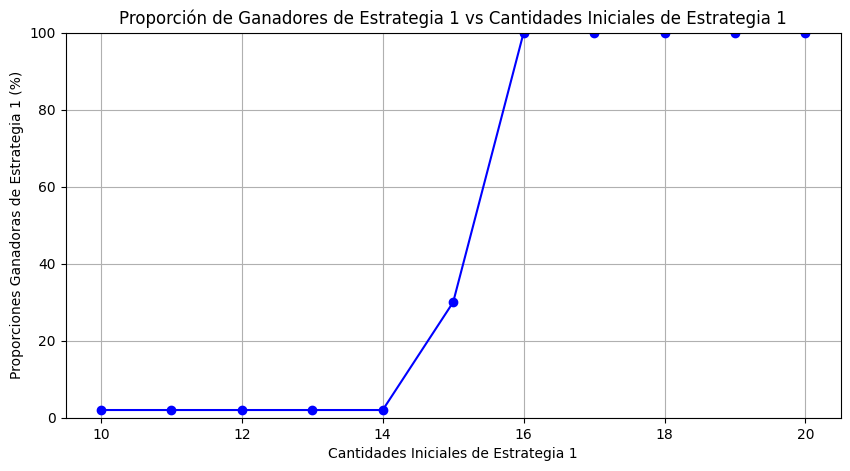

In [8]:
experimentos.criticalidad_ganador_dos_estrategias(antitacaña, tacaña, topologia_densa, 10, 10, 20, 1)

En el gráfico anterior, podemos observar que existe un **punto crítico** cuando las estrategias antitacañas alcanzan el 30% de la población global. Al superar esta cifra, observamos un **cambio de fase** a partir del cual las estrategias antitacañas pasan de ganar el 0% a ganar el 100% de las simulaciones.

Para interpretar este resultado, observemos que no existe una estrategia o combinación de estrategias mejor que la estrategia antitacaña para desplazar a la estrategia tacaña.

Supongamos que tenemos un conjunto de agentes implementando la estrategia tacaña y otro conjunto de agentes implementando una estrategia o combinación de estrategias no-tacañas.

En cada turno del juego, pueden suceder cuatro cosas:

1. Un tacaño sea oferente y un tacaño sea receptor. En ese caso, el payoff medio obtenido por los tacaños será de 5 puntos, el máximo posible para el *ultimatum game* en interacciones al interior de un mismo grupo. Ninguna estrategia antitacaña puede interferir la dinámica entre dos tacaños.

2. Un antitacaño sea oferente y algún no-tacaño sea receptor. En este caso, el máximo payoff medio posible para los participantes del juego es de 5 puntos. En la estrategia antitacaña que diseñamos, dos antitacaños que se encuentran también tienen un payoff medio de 5 puntos, el máximo posible en el ultimatum game en interacciones al interior de cualquier población no-tacaña. Ninguna población no-tacaña puede obtener un payoff medio mayor en las interacciones en su interior.

3. Un tacaño sea oferente y un no-tacaño sea receptor. Los tacaños siempre ofrecen 1. Para que la población no-tacaña crezca y la población tacaña disminuya entre las generaciones, el puntaje medio de los agentes no-tacaña debe ser mayor que el puntaje medio de los agentes tacaños. Aceptar la propuesta ayudaría más al puntaje medio de los agentes tacaños que al de los no-tacaños, por lo que rechazarla siempre es lo mejor para desplazar a los tacaños. La estrategia antitacaña rechaza sistemáticamente las ofertas tacañas.

4. Un no-tacaño sea oferente y un tacaño sea receptor. En ese caso, la estrategia antitacaña que diseñamos ofrece siempre 1, y este valor siempre es aceptado por los tacaños. Este es el mejor resultado posible para interacciones entre estrategias no-tacañas y estrategias tacañas en el *ultimatum game* con valores enteros.

Esto implica que el requisito mínimo del 30% de la población para desplazar a la estrategia tacaña una vez que monopolizó la conducta de los agentes es transitivo a todas las otras estrategias o poblaciones de estrategias. Siempre que más del 70% de la población implemente la estrategia tacaña, esta prevalece. Esto demuestra que la estrategia tacaña es **robusta** y que crea un efecto *lock-in* una vez que la población la adopta.

El hecho de que las estrategias antitacañas, al igual que las estrategias tacañas, obtengan una media de 5 puntos al negociar entre ellas, produce una dinámica interesante. Al graficar la media de puntos obtenidos por la población total de agentes en una generación según la proporción inicial de estrategias tacañas y antitacañas, obtenemos una clara parábola:

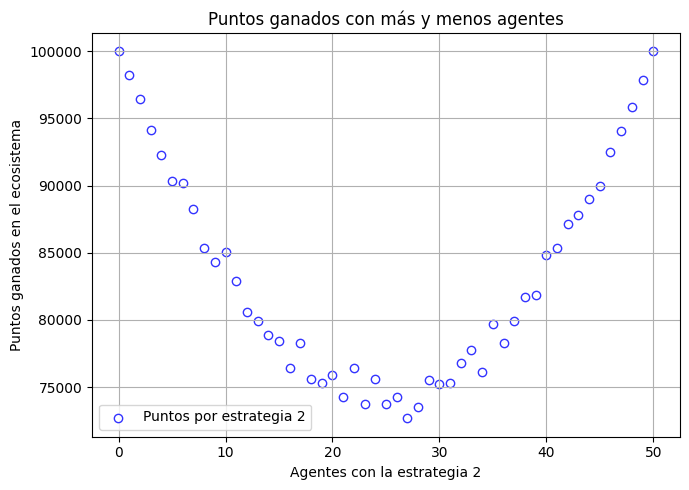

In [9]:
# En el siguiente gráfico, el eje X muestra la cantidad de agentes que adoptaron la estrategia antitacaña (estrategia 2), en una población de 100 agentes adoptando estrategias tacañas y antitacañas:

puntos = experimentos.puntos_segun_presencia_de_dos_estrategias(tacaña, antitacaña, topologia_densa)

Esto muestra que una vez que casi toda la población se decidió por alguna de las dos estrategias, tomar la estrategia mayoritaria no sólo es óptimo para los individuos que toman la decisión, sino que también contribuye al óptimo social.

Sin embargo, observemos que el mínimo de puntos a nivel social se da cuando el 50% de los agentes adopta la estrategia antitacaña, mientras que el cambio de fase poblacional a partir del cual la estrategia antitacaña empieza a triunfar se da cuando la implementa más del 30% de los agentes. Cuando la población antitacaña se encuentra entre ambos valores, los nuevos agentes que la adopten aumentarán su *payoff* medio pero reducirán el *payoff* medio de la población general en el corto plazo.

Podemos observar la evolución del *payoff* medio para la población general a medida que los agentes adoptan la estrategia antitacaña cuando la población inicial de antitacaños se aproxima al 30%.

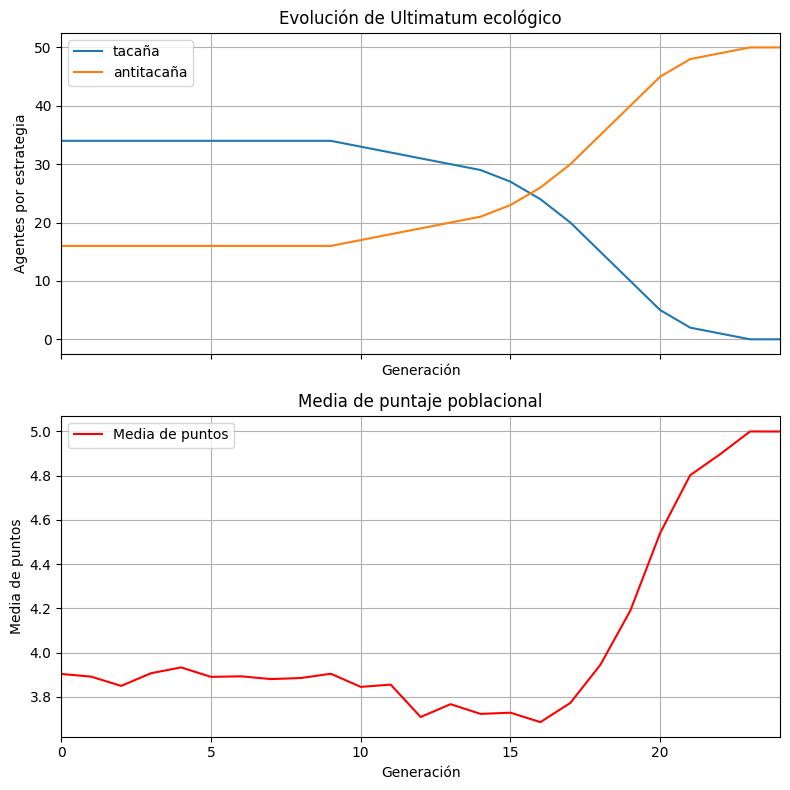

In [11]:
estrategias = {
    "tacaña" : (tacaña[0], tacaña[1], 34),
    "antitacaña" : (antitacaña[0], antitacaña[1], 16)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa, True)


Podemos observar que el *payoff* medio alcanza un mínimo cuando la estrategia antitacaña iguala en población a la estrategia tacaña, y luego asciende abruptamente.

El estudio de la estrategia antitacaña deja dos conclusiones interesantes. Por un lado, que la estrategia tacaña es robusta una vez que fue adoptada por la mayoría de la población y tiende a prevalecer siempre que es adoptada por más del 70% de la población. Por otro lado, que existen contextos poblacionales en que la estrategia tacaña deja de ser la más conveniente.
    
La segunda observación nos permite formular una hipótesis de por qué las personas no suelen implementar la estrategia tacaña en la práctica.


### 5 - La reciprocidad genera una cuenca robusta

Hasta aquí, observamos que la estrategia tacaña 1) es robusta, 2) tiene características que facilitan su emergencia en contextos de prueba y error, 3) tiende a alcanzar un payoff medio óptimo a medida que la implementa una mayor cantidad de agentes. Sin embargo, existen contextos poblacionales en que la estrategia tacaña deja de ser óptima. Eso nos permite formular una hipótesis de por qué las personas implementan una estrategia distinta a la tacaña en la práctica, basada en algunas observaciones de la psicología evolutiva y la economía conductual.

Desde la psicología evolutiva se ha propuesto que las emociones de la gratitud y el enfado funcionan como heurísticas cognitivas para implementar la **reciprocidad**, una estrategia robusta y exitosa en contextos de dilema del prisionero iterado (Axelrod, 1983; Bloom, 2008). Las heurísticas cognitivas, y en particular, las emociones, impactan en las decisiones económicas (Kahneman, 1974; Heilman, 2016). Particularmente, el rechazo a ofertas bajas en el ultimatum game suele asociarse a la emoción de fastidio (Sanfey., 2003; van’t Wout, 2006).

Considerando esta información, nuestra hipótesis es que las personas implementan heurística y emotivamente una estrategia similar a la reciprocidad en el ultimatum game, a la que denominamos "estrategia recíproca", y que el uso generalizado de la estrategia recíproca produce un equilibrio estable y robusto ante la presencia de estrategias tacañas, lo que dificulta la emergencia de la misma en la conducta empírica de las personas.

Para poner a prueba la hipótesis, formulamos una versión de la reciprocidad adaptada para el ultimatum game iterado, a la que denominamos "estrategia recíproca", y evaluamos su interacción con otras estrategias en contextos ecológicos.

#### 5.1 - Diseño de una estrategia recíproca

En el dilema del prisionero iterado, la reciprocidad funciona del siguiente modo:
1. En el primer encuentro, colaborar.
2. En los encuentros subsiguientes, hacer lo que hizo el coparticipante en el encuentro anterior. Si colaboró, colaborar; si traicionó, traicionar.

En esta sección, trabajamos con una versión de la reciprocidad adaptada para el *ultimatum game* que es un juego asimétrico.

Estrategia **recíproca**:
- Empieza ofreciendo 5 (análogo a empezar colaborando). En encuentros subsiguientes, ofrece 5 si el coparticipante ofreció 5 o más en el encuentro anterior, y ofrece 1 si el coparticipante ofreció menos de 5 en el encuentro anterior.
- Acepta una oferta si y solo si es mayor o igual a 5.

Para iniciar la evaluación, veamos el rendimiento de la estrategia recíproca en el mismo contexto de control en el que iniciamos la evaluación de la estrategia tacaña.

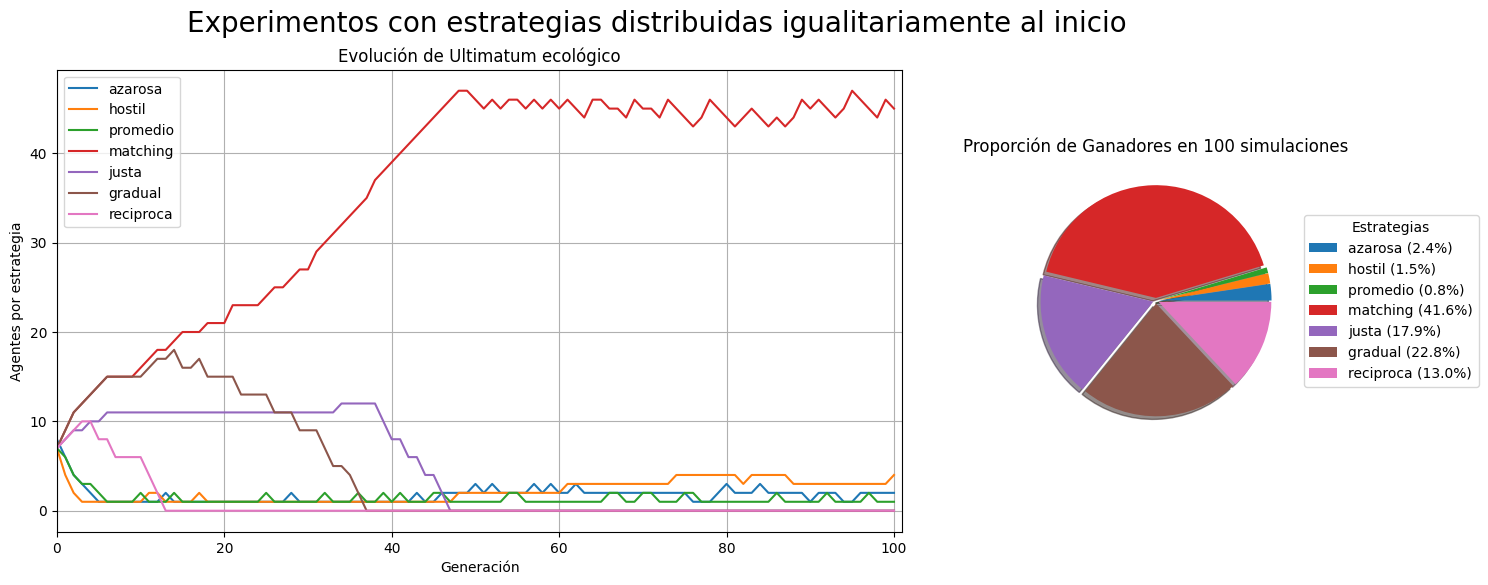

In [5]:
estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 8),
    "hostil" : (hostil[0], hostil[1], 7),
    "promedio" : (promedio[0], promedio[1], 7),
    "matching" : (matching[0], matching[1], 7),
    "justa" : (justa[0], justa[1], 7),
    "gradual" : (gradual[0], gradual[1], 7),
    "reciproca" : (reciproca[0], reciproca[1], 7)
}

experimentos.graficar_evolucion_y_ganadores(estrategias, topologia_densa, cantidad_simulaciones=100, titulo="Experimentos con estrategias distribuidas igualitariamente al inicio")

Podemos observar que la estrategia recíproca no alcanza un rendimiento tan bueno como el de la estrategia tacaña en condiciones de control. 

Sin embargo, cuando la estrategia recíproca empieza siendo implementada por el 40% de los agentes, los resultados cambian.

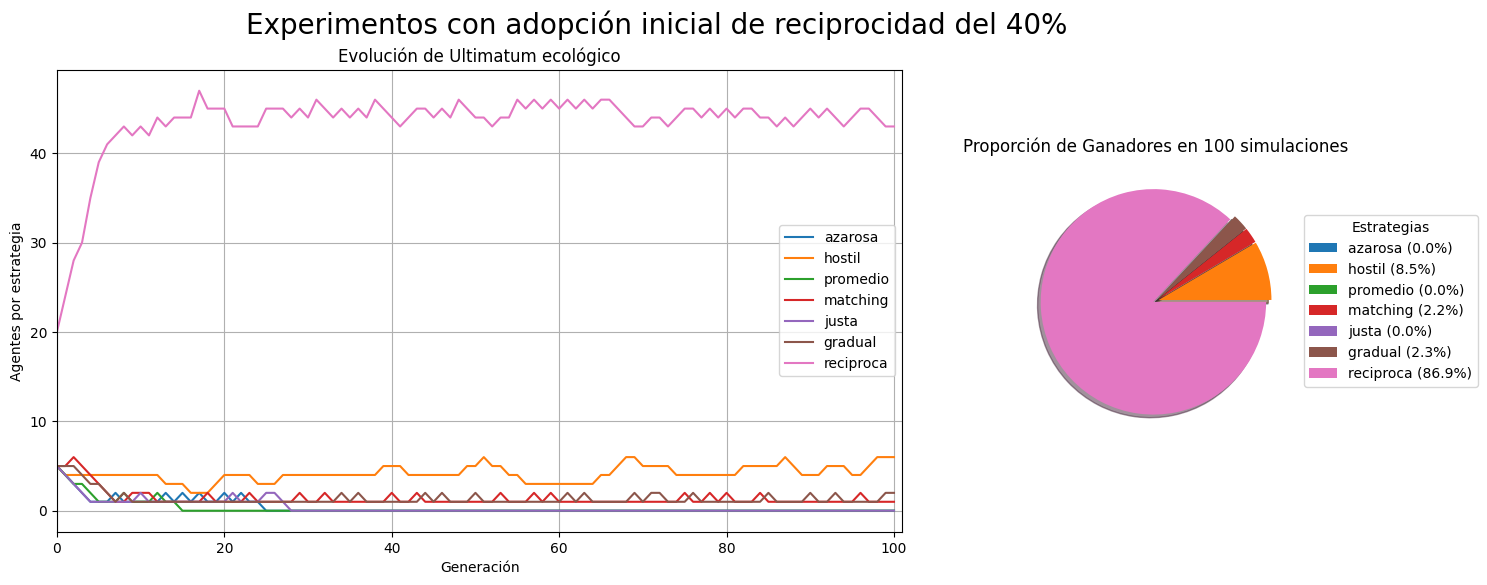

In [7]:
estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 5),
    "hostil" : (hostil[0], hostil[1], 5),
    "promedio" : (promedio[0], promedio[1], 5),
    "matching" : (matching[0], matching[1], 5),
    "justa" : (justa[0], justa[1], 5),
    "gradual" : (gradual[0], gradual[1], 5),
    "reciproca" : (tacaña[0], tacaña[1], 20)
}

experimentos.graficar_evolucion_y_ganadores(estrategias, topologia_densa, cantidad_simulaciones=100, titulo="Experimentos con adopción inicial de reciprocidad del 40%")

#### 5.2 - Analizando a la recíproca contra la tacaña

En la introducción, observamos que es plausible que las personas implementen estrategias recíprocas heurísticamente. Si esto diera una ventaja en la adopción inicial a la estrategia recíproca, podría favorecer al rendimiento de la estrategia recíproca en la ecología de estrategias.

En contextos de adopción inicial similar, la estrategia tacaña puede interferir sobre el buen rendimiento de la estrategia recírpoca.

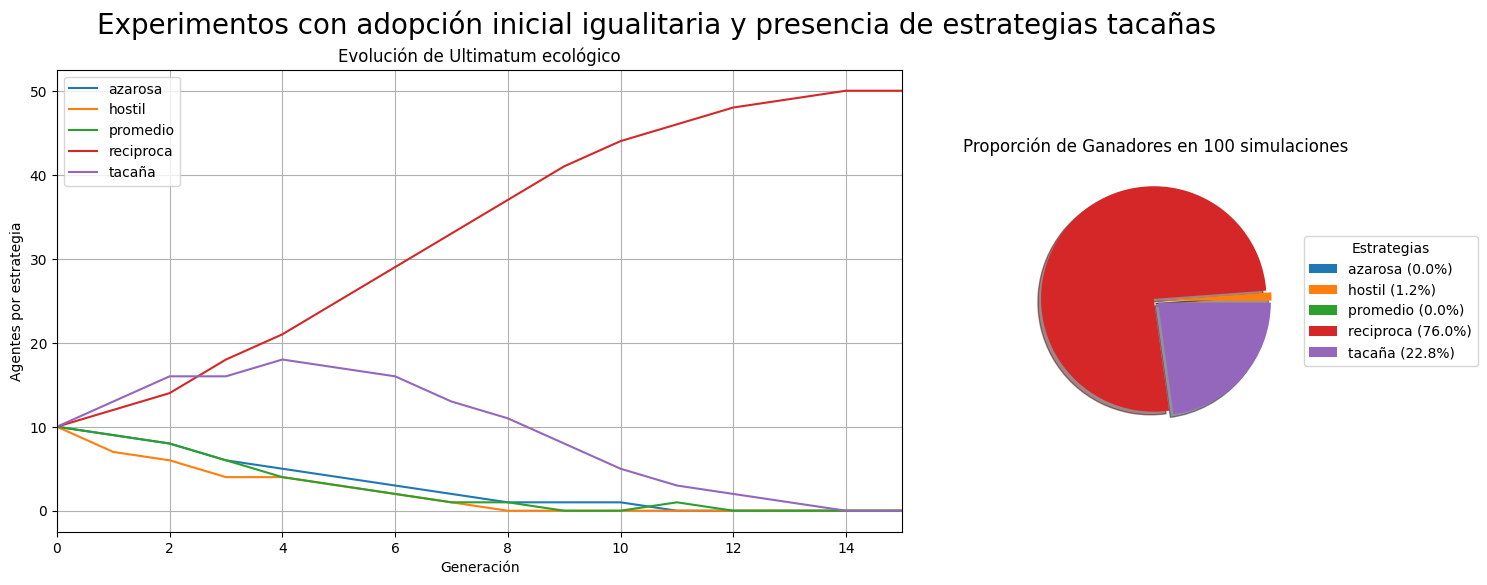

In [9]:
estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 10),
    "hostil" : (hostil[0], hostil[1], 10),
    "promedio" : (promedio[0], promedio[1], 10),
    "reciproca" : (reciproca[0], reciproca[1], 10),
    "tacaña" : (tacaña[0], tacaña[1], 10)
}

experimentos.graficar_evolucion_y_ganadores(estrategias, topologia_densa, cantidad_simulaciones=100, titulo="Experimentos con adopción inicial igualitaria y presencia de estrategias tacañas")

Tal como lo hicimos al estudiar la estrategia antitacaña, podemos investigar a partir de qué proporciones de estrategias recíprocas estas se vuelven más exitosas que las estrategias tacañas. Para ello, graficamos la proporción de ejecuciones en que gana la estrategia recíproca en función de la cantidad de agentes que inician adoptando la estrategia recíproca en una población de 50 agentes. El siguiente gráfico refiere a la estrategia recíproca como "Estrategia 1".

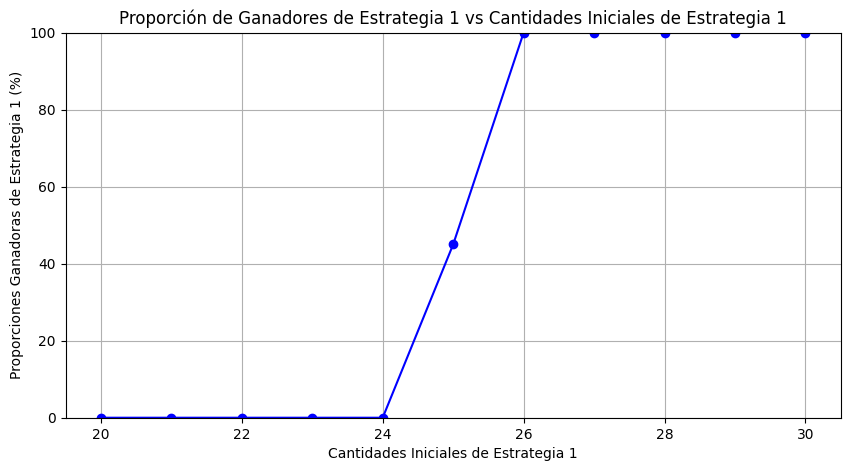

In [10]:
experimentos.n_generaciones = 700
experimentos.criticalidad_ganador_dos_estrategias(reciproca, tacaña, topologia_densa, 10, 20, 30, 1)
experimentos.n_generaciones = 100

Podemos observar que el cambio de fase en este caso sucede para una adopción inicial de las estrategias recíprocas del 50%. Esto implica que una vez que la estrategia recíproca es adoptada por más del 50% de la población, se vuelve más conveniente que la estrategia tacaña. Si existiera un sesgo heurístico lo suficientemente importante para que las personas reales implementen la estrategia recíproca, la propia ecología de estrategias haría que la estrategia recíproca se torne más conveniente que la tacaña. Esto puede generar una cuenca de atracción robusta que favorece la adopción de la estrategia recíproca por la totalidad de la población.

A continuación, podemos analizar la media poblacional de puntos para la totalidad de los agentes en una generación, en función de los porcentajes iniciales de adopción entre las estrategias tacañas y antitacañas.  


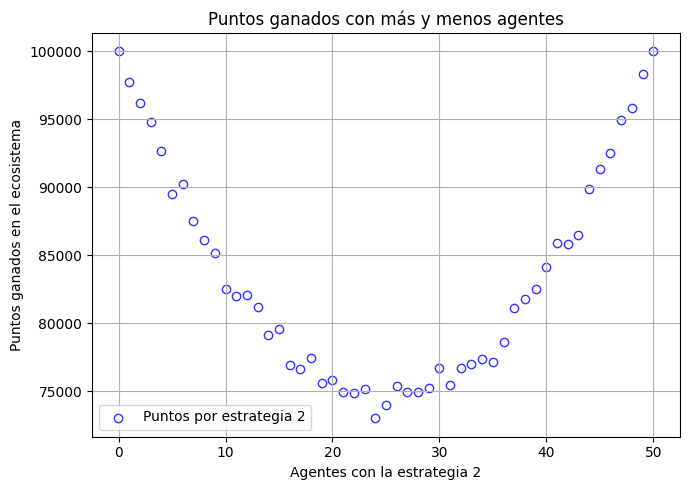

In [7]:
puntos = experimentos.puntos_segun_presencia_de_dos_estrategias(tacaña, reciproca, topologia_densa)

Observamos que cuando más de la mitad de los agentes inicia implementando la estrategia recíproca, el incremento en su adopción aumenta la media de *payoffs* a nivel poblacional.

A diferencia de lo que observamos para el caso de la estrategia antitacaña, una vez que la estrategia recíproca es más conveniente que la estrategia tacaña a nivel individual, el incremento en su adopción también es beneficioso para la totalidad de la población.

Existen parámetros iniciales en la adopción de estrategias que permiten reproducir algunos valores macroscópicos obesrvados experimentalmente. Por ejemplo, podemos medir la oferta mediana, la oferta media y el porcentaje de ofertas menores a 5 que fueron rechazadas para una población inicial de estrategias recíprocas del 75%, con el 25% restante de estrategias tacañas.

In [ ]:

estrategias = {
    "reciproca" : (reciproca[0], reciproca[1], 32),
    "tacaña" : (tacaña[0], tacaña[1], 18)
}
oferta_mediana, oferta_media, porcentaje_de_ofertas_menores_a_5_rechazadas = experimentos.obtener_variables_macroscopicas(estrategias, topologia_densa)

print(f"La oferta mediana fue {oferta_mediana}")
print(f"La oferta media fue de {oferta_media}")
print(f"El porcentaje de ofertas menores a 5 que fue rechazada fue del {round(porcentaje_de_ofertas_menores_a_5_rechazadas)}%")

La oferta mediana fue 5.0
La oferta media fue de 3.8857142857142857
El porcentaje de ofertas menores a 5 que fue rechazada fue del 77%


El resultado, aunque anecdótico, motiva a continuar la investigación en la ecología de estrategias. Tras formular una hipótesis teóricamente plausible de la adopción práctica de estrategias y demostrar que es consistente con los resultados observados en la ecología de estrategias, un siguiente paso interesante en la investigación es estudiar la posibilidad de reproducir valores observados empíricamente con modelos *bottom-up* sencillos, como criterio de corroboración de las hipótesis formuladas.

### 6 - Conclusiones

Aunque los equilibrios de Nash para juegos de una sola instancia no siempre inducen estrategias convenientes en contextos de juegos iterados, la estrategia tacaña es exitosa en contextos ecológicos de control. Además, es una estrategia simple y consistente, lo cual favorece su adopción en contextos de prueba y error. Además, una vez que es adoptada por la totalidad de la población, es socialmente óptima y robusta, lo cual genera un efecto *lock-in* que dificulta su desplazamiento. Sin embargo, las personas no suelen implementarla en la práctica.

Observaciones de la Economía Conductual sugieren que las personas tienen sesgos emocionales que favorecen inicialmente la adopción de estrategias recíprocas. En contextos ecológicos, un sesgo inicial suficientemente fuerte hacia la adopción de estrategias recíprocas puede amplificarse, creando una cuenca robusta que promueve la adopción generalizada de la estrategia recíproca. A diferencia de la estrategia antitacaña, la estrategia recíproca se vuelve conveniente tanto a nivel individual como social.

Para comprender mejor estos fenómenos, es fundamental explorar la literatura existente. Los trabajos pioneros de D. Kahneman y A. Tversky sobre la teoría de las perspectivas (1979) y los estudios de E. Fehr y K. Schmidt sobre la aversión a la desigualdad (1999) son referencias clave. Kahneman y Tversky, en su teoría de las perspectivas, demostraron cómo las personas toman decisiones bajo incertidumbre, revelando que los individuos no siempre actúan de manera racional. En su lugar, sus decisiones están influenciadas por sesgos cognitivos que distorsionan su percepción del riesgo y la recompensa, desencadenando en toma de elecciones inesperadas y emergentes desde un punto de vista ortodoxo. Este comportamiento se observa en contextos donde la reciprocidad y la justicia percibida son factores importantes para los agentes a la hora de decidir. Además, en su artículo "Judgment under Uncertainty: Heuristics and Biases" (1974), explorarn cómo las heurísticas influyen en el juicio humano, identificando varios sesgos que afectan las decisiones.  


Con el uso de un enfoque generativo y bottom-up, pudimos replicar ciertos valores macroscópicos observados en los experimentos en una investigación inicial con resultados alentadores. Estos resultados indican que el uso de modelos computacionales puede ayudar a comprender mejor cómo las estrategias se utilizan en las poblaciones humanas.  

Una revisión más profunda de la literatura sobre economía conductual, así como estudios de campo que utilicen estos modelos en situaciones reales, podrían ser ventajosos para investigaciones futuras. Analizar en detalle los trabajos existentes permitiría identificar comportamientos emergentes, patrones y tendencias que podrían no ser evidentes en estudios aislados. Además, la realización de estudios de campo en diversos contextos económicos y sociales permitiría observar cómo se comportan estas estrategias en escenarios reales, proporcionando datos empíricos que enriquecerían la comprensión teórica.  

Esto, a su vez, brindaría una base más sólida para la aplicación práctica de estas técnicas en una variedad de contextos económicos y sociales, desde políticas públicas hasta estrategias empresariales. La integración de estos enfoques contribuiría a desarrollar estrategias más robustas y adaptativas, capaces de enfrentar los desafíos dinámicos y complejos del mundo real.

### 7 - Próximos pasos

#### 7.1 - Enfoque ecológico

1. En nuestros experimentos, cada generación estuvo compuesta de 10000 juegos del ultimatum game en una población de 50 agentes. Con estos valores, cada agente participa en promedio en 400 juegos, y tiende a encontrarse 8 veces con cada otro agente. Aunque estos valores son suficientes para que los agentes jueguen entre sí con un historial significativo, sería sensato reproducir los experimentos con más iteraciones por generación para asegurarnos considerar todos los posibles efectos a largo plazo de cada una de las estrategias.

2. En el dilema del prisionero iterado, las estrategias que coperan siempre, independientemente de lo que hagan los coparticipantes, puede triunfar cuando el resto de los agentes incorporan la reciprocidad. Sin embargo, su existencia implica una vulnerabilidad en la población, porque a diferencia de las estrategias recíprocas, las estrategias cooperativas son explotables por estrategias traidoras. Nos gustaría profundizar el análisis de la ecología de estrategias para evaluar los efectos de la intromisión de estrategias ingenuas en el *ultimatum game* iterado para evaluar si inducen vulnerabilidades sobre una población de estrategias recíprocas.

3. En contextos experimentales, existen diferencias en la adopción de estrategias en distintas culturas. Algunos experimentos introdujeron la posibilidad de penalizar terceros participantes según la estrategia que adoptan en sus encuentros para explicar este fenómeno (Sapolsky, 2017). Nos interesa investigar la relación entre las estrategias adoptadas, las tendencias de penalización social, y la influencia sobre la media social de puntos según las diferencias en adopción de distintas estrategias en diferentes contextos poblacionales.

4. En una versión anterior del informe, habíamos incorporado histogramas para evaluar las diferencias de puntajes obtenidas por cada agente al final de una generación para una población inicial determinada. Los eliminamos de la versión final porque la cantidad de turnos por generación implementados no era lo suficientemente alta para descartar que las observaciones pudieran deberse a la distribución estadística de la participación en juegos contra estrategias diferentes y roles diferentes. Al incorporar una mayor cantidad de iteraciones por generación en los experimentos, sería interesante evaluar índices de desigualdad inducidos por la adopción de distintas estrategias, como el coeficiente de Gini, para investigar si la estrategia tacaña induce mayor desigualdad que la estrategia recíproca.

5. Ninguna de las estrategias que evaluamos consideró la cantidad de vecinos de los agentes en el grafo. Sería interesante enriquecer el estudio con estrategias que consideren esta información, y evaluar posibles ventajas de contar con más vecinos en el grafo.

6. Implementamos una versión de la estrategia recíproca adaptada a la asimetría del *ultimatum game*. En principio, la adaptación podría haber sido diferente. Sería interesante evaluar otras formas de adaptar la reciprocidad al *ultimatum game* y analizar su funcionamiento.

7. En un resultado anecdótico, reprodujimos valores observados experimentalmente desde un modelo *bottom-up*. Sería interesante enriquecer el análisis ecológico del *ultimatum game*, y la hipótesis aquí considerada, reproduciendo más resultados macroscópicos empíricos, y de manera sistemática y robusta.

8. En algunos sistemas complejos, existen sistemas de victorias no transitivas (por ejemplo, que A le gane a B, B le gane a C, y C le gane a A, para algunas poblaciones iniciales). Esto podría generar comportamientos cíclicos en las poblaciones para algunas poblaciones iniciales. Nos gustaría investigar si existen este tipo de dinámicas para el *ultimatum game* iterado.

#### 7.2 - Enfoque genético

1. En el algoritmo genético que diseñamos, los agentes consideraban el historial de manera incompleta. Por ejemplo, consideraban sólo los últimos dos encuentros en el historial, y consideraban sólo el historial asociado a la acción que debían llevar a cabo (i.e. para ofrecer, consideraban el historial de sus propias ofertas anteriores, pero no el historial de ofertas recibidas). Para asegurarnos de que esto no sesgó los resultados, deberíamos adaptar las redes neuronales para considerar esta información.

2. En el diseño del algoritmo genético implementamos un método que diseña una estrategia para ganarle a otra estrategia particular. Generó resultados esperanzadores en implementaciones sencillas. Por el tiempo de ejecución necesario para el aprendizaje automático no nos dio el tiempo de incorporarlos, pero nos interesaría continuar investigando qué estrategias evolucionan para ganarle a la reciprocidad, a la estrategia antitacaña, etc.

3. En el diseño del algoritmo genético también implementamos un método que evoluciona una estrategia para triunfar en un contexto ecológico particular, cuyo estudio nos interesaría profundizar. 

4. El algoritmo genético permitiría estudiar contextos en que un agente siempre es oferente y otro agente es siempre receptor. Asimismo, nos permitiría estudiar contextos en que el agente oferente sea el nodo raíz de una topología de estrella y que todos sus vecinos sean receptores que compartan una estrategia. Estos experimentos permitirían investigar diferencias en los *payoffs* de los agentes que podrían emerger por cuestiones topológicas.

5. Nos interesa investigar la evolución de normas sociales (es decir, la capacidad de pagar parte del dinero ganado para penalizar a otros agentes del juego) enriqueciendo el algoritmo genético que hemos implementado.

### 8 - Bonus Track: Meme

Como vimos, cuando ponemos en práctica el Ultimatum Game, se da que las personas en lugar de ser perfectamente racionales para buscar maximizar su utilidad a menudo consideran factores como la justicia y la equidad, y pueden rechazar ofertas que consideran injustas, incluso si eso significa recibir nada en lugar de algo. Es decir, las personas preferimos castigar la desigualdad y el trato poco ético. Esta diferencia entre la teoría y la realidad se representa muy bien con este meme:


| ![img1](img/meme1.png) | ![img2](img/meme2.png)|
| -- | -- |
| ![img3](img/meme3.png) | ![img4](img/meme4.png)|

### 9 -  Referencias

- Axelrod, R. (1983). The Evolution of Cooperation.
- Bloom, P. (2008). Introduction to Psychology With Paul Bloom, Yale Open Courses, Evolution, Emotion and Reason [Video]. YouTube. https://youtu.be/i5IrSEIPdwk?si=WBHpx7UftK5jRSnt&t=1521
- Brosnan, S. (2009). Neuroeconomics.
- Heilman, R. M. (2016). Emotion regulation and economic decision-making. In Neuroeconomics.
- Holland, J. H. (2005). Adaptation in Natural and Artificial Systems.
- Kahneman, D., & Tversky, A. (1974). Judgment under uncertainty: Heuristics and biases. Science, 185(4157), 1124-1131.
- Sanfey, A. G., Rilling, J. K., Aronson, J. A., Nystrom, L. E., & Cohen, J. D. (2003). The neural basis of economic decision-making in the Ultimatum Game. Science, 300(5626), 1755-1758. https://doi.org/10.1126/science.1082976
- Sapolsky, R. M. (2017). Behave: The Biology of Humans at Our Best and Worst.
- Schuster, S. (2017). A new solution concept for the ultimatum game leading to the golden ratio. Nature. https://doi.org/10.1038/s41598-017-05360-7
- Stanley, K. O. (2002). Evolving neural networks through augmenting topologies.
- van’t Wout, M., Kahn, R. S., Sanfey, A. G., & Aleman, A. (2006). Affective state and decision-making in the Ultimatum Game. Experimental Brain Research, 169(4), 564-568. https://doi.org/10.1007/s00221-006-0346-5